<img src="gcd.png" align="right" style="float" width="92">
<img src=https://static.casadomo.com/media/2020/02/lonmark-espana-universidad-valencia-jornada-automatizacion.png  align="right" style="float" width="150">


<font color="#CA3532"><h1 align="left">Degree in Data Science.</h1></font>
<font color="#6E6E6E"><h2 align="left">Lab Session 2. Feature Extraction and Dataset Splitting. </h2></font> 


#### Miguel Ángel Fernández Torres, Yolanda Vives Gilabert, Álvaro Moreno Martínez, Marcelino Martínez Sober

## 2.1. Principal Component Analysis (PCA).


### 2.1.1 Handcrafted PCA

#### Load libraries

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from IPython.display import Markdown as md

In [2]:
# Generate a linear distribution of samples to be stored in the spotify.csv dataframe

from sklearn.datasets import make_regression
X, y = make_regression(n_samples=2000, n_features=1, n_informative=1, n_targets=1,
                       noise=30, random_state=1234)

y=y+300
y.reshape(y.shape[0],1)
a=np.column_stack((X,y))
    
a.shape
pd.DataFrame(a,columns=['Guitar_power','Quality']).to_csv('spotify.csv')

**Exercise.** Load the ``spotify.csv`` file and represent ``Guitar_power`` vs. ``Quality`` variables.



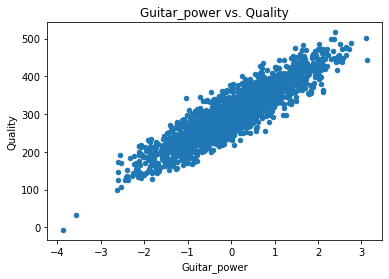

In [3]:
file_path = 'spotify.csv'
df = pd.read_csv(file_path)

# Plot 'Guitar_power' vs. 'Quality'
df.plot(x='Guitar_power', y='Quality', kind='scatter')
plt.title('Guitar_power vs. Quality')
plt.xlabel('Guitar_power')
plt.ylabel('Quality')
plt.show()

#### PCA computation step by step

**Exercise.** Standardize the two variables. Show again ``Guitar_power`` vs. ``Quality`` variables, being now standardized.

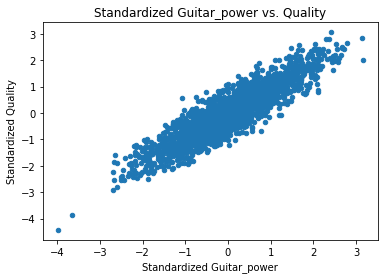

In [4]:
#Do not forget to transform the dataframe to array
from sklearn.preprocessing import StandardScaler
X=np.array(a)

scaler = StandardScaler().fit(X)
a_scaled = scaler.transform(X)

# Create DataFrame
df_standardized = pd.DataFrame(a_scaled, columns=['Guitar_power', 'Quality'])

# Save standardized DataFrame to CSV
df_standardized.to_csv('spotify_standardized.csv', index=False)

# Plot standardized 'Guitar_power' vs. 'Quality'
df_standardized.plot(x='Guitar_power', y='Quality', kind='scatter')
plt.title('Standardized Guitar_power vs. Quality')
plt.xlabel('Standardized Guitar_power')
plt.ylabel('Standardized Quality')
plt.show()

#### Compute the covariance matrix

In [5]:
Xm = a_scaled.copy()

cov_matrix = np.dot(Xm.T, Xm) / Xm.shape[0]


In [6]:
# This is the covariance matrix
cov_matrix

array([[1.        , 0.90088747],
       [0.90088747, 1.        ]])

#### Obtain the eigenvalues and eigenvectors of the covariance matrix

In [7]:
evals, evecs = np.linalg.eig(cov_matrix)

Eigenvectors given the basis of the new vector space...

In [8]:
#Eigenvectors
evecs

array([[-0.70710678, -0.70710678],
       [ 0.70710678, -0.70710678]])

Variance explained by each principal component

In [9]:
#Eigenvalues
evals

array([0.09911253, 1.90088747])

#### Now we will sort eigenvectors according to eigenvalues, in ascending order

In [10]:
# Sort eigenvectors from the highest to the lowest eigenvalue
idx = np.argsort(-evals)
evecs = evecs[:,idx]

**Exercise.** Compute the cumulative variance explained by each principal component, expresssed as a percentage.

In [11]:
# Sort eigenvalues to show the percetage of variance explained by each PC

# Sort variance explained and cumulative variance explained
variance_explained = evals / np.sum(evals) * 100

# Sort in descending order
sorted_idx = np.argsort(-variance_explained)
variance_explained_sorted = variance_explained[sorted_idx]

cumulative_variance_explained = np.cumsum(variance_explained_sorted)

# Print the results
for i in range(len(evals)):
    print(f"Principal Component {i+1}: Variance Explained = {variance_explained_sorted[i]:.2f}%, Cumulative Variance Explained = {cumulative_variance_explained[i]:.2f}%")


Principal Component 1: Variance Explained = 95.04%, Cumulative Variance Explained = 95.04%
Principal Component 2: Variance Explained = 4.96%, Cumulative Variance Explained = 100.00%


In [12]:
a = cumulative_variance_explained.round(2)[0]

md("The first principal component explains the {}% of \
the variance of the dataset... Therefore, only one variable is needed to explain the dataset!".format(a))

The first principal component explains the 95.04% of the variance of the dataset... Therefore, only one variable is needed to explain the dataset!

#### Obtain samples in the transformed PCA space (data rotation).

In [13]:
Xpca = np.dot(evecs.T, Xm.T).T
Xpca

array([[-1.02253158,  0.15311143],
       [-2.07634997, -0.17371891],
       [ 1.3323686 , -0.00249809],
       ...,
       [ 0.85148786, -0.27889442],
       [ 1.54229877,  0.38920526],
       [ 1.91094249, -0.30655642]])

In [14]:
Xpca = np.dot(Xm,evecs)
Xpca

array([[-1.02253158,  0.15311143],
       [-2.07634997, -0.17371891],
       [ 1.3323686 , -0.00249809],
       ...,
       [ 0.85148786, -0.27889442],
       [ 1.54229877,  0.38920526],
       [ 1.91094249, -0.30655642]])

Show the relationship between PC1 and PC2

(-6.0, 4.0)

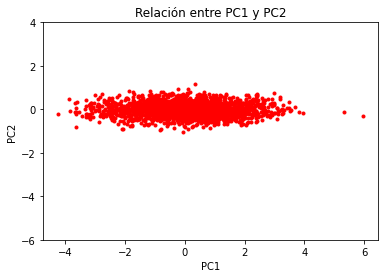

In [15]:
fig,ax = plt.subplots()
ax.plot(Xpca[:,0],Xpca[:,1],'.r')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Relación entre PC1 y PC2')
ax.set_ylim([-6, 4])#Para ver  bien el efecto...

**Exercise.** Compute the covariance matrix of the data in the PCA space and check that it corresponds with the original eigenvalues.

In [16]:
# This is the data covariance matrix after applying PCA.

cov_matrix_com = np.dot(Xpca.T, Xpca) / Xpca.shape[0]
evals, evecs = np.linalg.eig(cov_matrix_com)
evals

array([1.90088747, 0.09911253])

### 2.1.2 PCA using sklearn

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [17]:
from sklearn import decomposition

In [18]:
model_pca = decomposition.PCA(n_components=2)


In [19]:
model_pca.fit(a_scaled)

PCA(n_components=2)

In [20]:
print(model_pca.components_)
print(model_pca.explained_variance_)
print(model_pca.explained_variance_ratio_)
print(model_pca.mean_) # Centered data, mean equal to 0
print(model_pca.n_features_)
print(model_pca.n_samples_)


[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[1.90183839 0.09916211]
[0.95044373 0.04955627]
[-2.66453526e-17 -1.28418387e-14]
2
2000


In [21]:
Xpca_scikit = model_pca.transform(a_scaled)

(-6.0, 4.0)

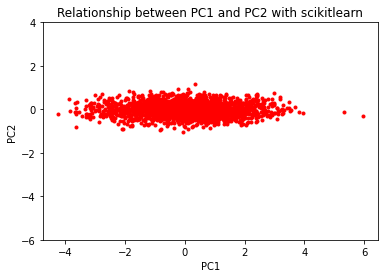

In [22]:
fig,ax = plt.subplots()
ax.plot(Xpca_scikit[:,0],Xpca_scikit[:,1],'.r')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Relationship between PC1 and PC2 with scikitlearn')
ax.set_ylim([-6, 4]) # For a better visualization



#### Characteristic parameters of PCA can be also shown

In [23]:
#Autovalores
print(model_pca.explained_variance_)


#autovectores
print(model_pca.components_)

#Varianza explicada
print(model_pca.explained_variance_ratio_)



[1.90183839 0.09916211]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[0.95044373 0.04955627]


**Exercise.** Apply PCA using scikit learn and the California Housing dataset. Don't forget to standardize the California Housing variables first!

In [24]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
Xraw = housing.data

X_standardized = StandardScaler().fit_transform(Xraw)

n_components = 8
pca = decomposition.PCA(n_components=n_components)
X_pca = pca.fit_transform(X_standardized)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

**Exercise** Compute the percentage of variance explained by each principal component, given the California Housing dataset and the parameters provided by the scikitlearn object.

In [25]:
columns = [f"PC{i+1}" for i in range(n_components)]
X_pca_df = pd.DataFrame(X_pca, columns=columns)

print(f"Explained Variance Ratio [%]: {pca.explained_variance_ratio_*100}")

Explained Variance Ratio [%]: [25.33686779 23.51624488 15.88863455 12.887971   12.53819501  8.24225039
  1.02002231  0.56981407]


**Exercise** Show the explained variance vs. the number of principal components. Explain how the dataset dimensionality could be reduced in a data science problem, based on the results obtained.

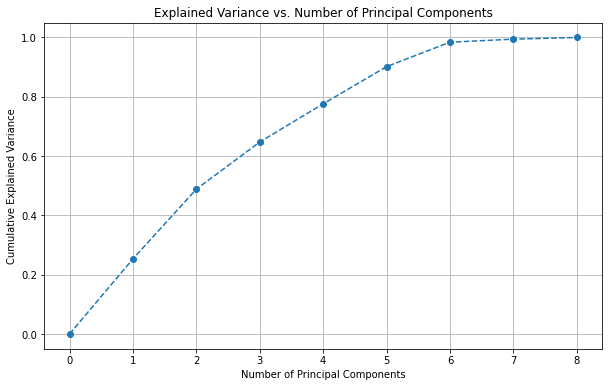

In [26]:
plt.figure(figsize=(10, 6))
plt.plot([0] + list(range(1, len(pca.explained_variance_ratio_) + 1)), [0] + list(np.cumsum(pca.explained_variance_ratio_)), marker='o', linestyle='--')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

The plot shows that 2 variables have small inpact on the result. 
To reduce the dimensionality we can delete and make 6 dimensions.

## 2.2 Dataset splitting

### 2.2.1.  Hold-out

The *hold-out* technique consists in dividing the dataset into two subsets for training and testing purposes, respectively. *hold-out* is also used when there are model hyperparameters to adjust. In this case, the training subset is also splitted into training and validation subsets. The training subset is used to train the model by trying out different parameter combinations, while the validation subset allows evaluating the model performance given those combinations. At the end of the procedure, the set of paramters which provides the best performance is selected, and the model is re-trained using the whole training set. In the following exercises about dataset splitting we will adjust the parameters of a linear regression model.

It shoudl be noted that the test subset is not used during the training process, whose **only purpose** is to evaluate the performance of the final model.

During the last lab session, we learned how the `train_test_split` in scikit-learn can be used for dataset splitting, today we will do it with numpy.

#### First we generate a dataset to work with it.

In [27]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, n_features=10, n_informative=8, n_targets=1,
                       noise=0.1, random_state=1234)

#### Now we will split it by following a random partition. Use  `np.random.permutation` to this end.

In [28]:
ptrain = 2/3  # % percentage of training samples
N = X.shape[0]
idx = np.random.permutation(N)
ntrain = np.fix(N * ptrain).astype('int')
Xtrain = X[idx[:ntrain], :]
ytrain = y[idx[:ntrain]]
print(Xtrain.shape)
print(X.shape)
idx

(133, 10)
(200, 10)


array([ 23, 171,  29,  55,  15, 111,  21,  30, 116, 160,  17,  78,  59,
       175,  51, 134,  45, 153,  94, 103,  37,  58, 173,  86,   4,  52,
        96,  83, 178, 113,  40,  65, 121, 194, 115, 107,  57, 127,   3,
        60,  99, 192, 142,  62,  16,  90, 136,  47, 101, 124, 157,  64,
        69, 100, 182, 164, 158,  76,   9,  97, 117,  27,  81,  11, 199,
       125, 122, 166, 168,  54,   0, 147,  85,  73,  26,  74, 177,  91,
        79, 181,  56, 169,  43, 154, 163,  18,   2,  84,  92, 150, 138,
       165, 151,  42, 130, 143,  61, 195, 139,   1, 123, 155, 145, 193,
       131,  87, 108, 109, 102,  68,  53,  19, 187, 126,  98,  71, 135,
       110, 137, 170,  77, 191, 183,  28, 159,  93, 179,  31, 104,  20,
         8, 119, 141,  80, 198,  46, 188,  75, 118, 129,   5, 196,  35,
       176, 149,  24, 105,  50, 140,  82, 184,  34, 106,  63,  44, 144,
       114, 120, 174, 148, 186,  25,  70,  22, 197,  66, 132, 167,  95,
       133, 190,  10,  14, 156,  41, 172, 146,   6,  49,  89,  4

**Exercise.** Obtain the test subset: Xtest, ytest

In [29]:
Xtest = X[idx[ntrain:], :]
ytest = y[idx[ntrain:]]
print(Xtest.shape)
print(ytest.shape)

(67, 10)
(67,)


**Exercise.** We need a model for our experiments. Train a simple linear regression model, based on what we learned in the previous lab session.

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(Xtrain, ytrain)
yp = lr.predict(Xtest)
print('MSE', np.sum((ytest - yp)**2) / len(ytest))

MSE 0.010244962298581812


#### First test: Evaluate the model performance using the $R^2$ score (squared Pearson correlation is provided by default in scikitlearn).

In [31]:
# Por defecto `score` calcula el índice de correlación de Pearson al cuadrado
R2 = lr.score(Xtrain, ytrain)

$R^2$ is a good metric, but most of the times we want to evaluate our results using several metrics (why?)
- Using multiple metrics provides a more nuanced understanding of a model's strengths and weaknesses, guides model development and selection, and ensures that the evaluation process aligns with the specific goals and context of the problem at hand.

Two other well-known metrics are *root mean square error* (RMSE) and *mean absolute error* (MAE)
- RMSE = $\sqrt{\frac{1}{N}\sum_{i=0}^{N-1}(y_i-\hat{y_i})^2}$
- MAE =  $\frac{1}{N}\sum_{i=0}^{N-1}|y_i-\hat{y_i}|$

In [32]:
def rmse(y, yp):
    return np.sqrt(np.sum((y-yp)**2) / y.shape[0])

**Exercise.** Create a function to compute MAE.

In [33]:
def mae(y, yp):
    return np.sum(abs(y - yp)) / len(y)

In [34]:
# Of course, a lot of these metrics are available in scikit-learn
# from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Print results

In [35]:
yp = lr.predict(Xtrain)
print('R2', R2, 'RMSE', rmse(ytrain, yp), 'MAE', mae(ytrain, yp))

R2 0.999999728405688 RMSE 0.08977147975217933 MAE 0.07077356929384837


In [36]:
lr.score(Xtrain, ytrain)

0.999999728405688

#### Two important aspects to consider:
1. Each metrics informs about the accuracy of the model based of different properties.
2. Take note on these results to compare them with the ones obtained with the following methods.

Results computed based only on a unique dataset split (training and test) could not be realistic enough to evaluate the performance of the model. Furthermore, we may have overfitted the model if it memorize the training data, being unable to provide accurate predictions for unseen data. This phenomena is called *overfitting* and should be avoided when training a model.

**Exercise.** 

* What happens when the model is applied on unseen data, do the values for the metrics change?
<br> Values for the metrics may change if overfitting has accured or if training and testing data set was not representative. If trainig and testing has been done well the value for metrics does not change.
* Evaluate the model performance on the test subset. Compare and discuss the results obtained for training and test subsets.
<br> The performance of the model is similar to the test set so the model is trained corectly. It means that there is no overfitting.


In [37]:
R2t = lr.score(Xtest, ytest)
ypt = lr.predict(Xtest)
print('R2', R2t, 'RMSE', rmse(ytest, ypt), 'MAE', mae(ytest, ypt))

R2 0.9999997128293118 RMSE 0.10121740116492722 MAE 0.08201818059323428


### 2.2.2 k-fold
One of the limitations of the *hold-out* method is that, when randomly splitting the dataset, it may happen that the partition carried out could be particularly suitable for model training and testing, apparently providing very accurate results.

An option for a more accurate evaluation is to split the dataset multiple times and test different combinations of training and test subsets. This is done systematically by k-fold (or v-fold), as illustrated in the following figure.

<img alt="k-fold" src="kfold.png" width="500px">

##### Now we will use the scikit-learn functions to get the different subsets.


**Exercise.** Complete the code below to train and test considering **k-fold**.

In [38]:
%%time
# Use KFold in scikit-learn
from sklearn.model_selection import KFold

nf = 5  # number of folds
kf_r2, kf_rmse, kf_mae = [], [], []  # Lists to store the results
kf = KFold(n_splits=nf, shuffle=True, random_state=1234)
for train, test in kf.split(Xtrain):  # Question: Is it the same to use kf.split(X,y)? yes it does not metter 
    XtrainF, ytrainF = Xtrain[train, :], ytrain[train]
    XtestF, ytestF = Xtrain[test, :], ytrain[test]

    lr = LinearRegression()
    lr.fit(XtrainF, ytrainF)
    R2f = lr.score(XtestF, ytestF)
    ypf = lr.predict(XtestF)
    kf_r2.append(lr.score(XtestF, ytestF))
    kf_rmse.append(rmse(ytestF, ypf))
    kf_mae.append(mae(ytestF, ypf))


[0.999999768917818, 0.9999997430600115, 0.9999993819213205, 0.9999994377231954, 0.9999997890961313]
[0.09073214649394114, 0.10203349354453844, 0.1278810391943245, 0.09500084871797634, 0.077030911276772]
[0.07069576056889458, 0.08196408089364828, 0.09728802450831404, 0.08114627045570669, 0.062257283984101866]
CPU times: user 93.2 ms, sys: 34.2 ms, total: 127 ms
Wall time: 20.8 ms


In [44]:
import statistics
# Plot results
print('R2', kf_r2)
print('Avg of R2:' , statistics.mean(kf_r2))
print('RMSE', kf_rmse)
print('Avg of RMSE:' , statistics.mean(kf_rmse))
print('MAE', kf_mae)
print('Avg of MAE:' , statistics.mean(kf_mae))

R2 [0.999999768917818, 0.9999997430600115, 0.9999993819213205, 0.9999994377231954, 0.9999997890961313]
Avg of R2: 0.9999996241436954
RMSE [0.09073214649394114, 0.10203349354453844, 0.1278810391943245, 0.09500084871797634, 0.077030911276772]
Avg of RMSE: 0.09853568784551049
MAE [0.07069576056889458, 0.08196408089364828, 0.09728802450831404, 0.08114627045570669, 0.062257283984101866]
Avg of MAE: 0.07867028408213309


**Exercise.**

* Do we obtain similar values for the evaluation metrics and the different subsets provided by **k-fold**?
<br> The obtained values for the evaluation metrics are similar but not identical
* Compute the average values for the metrics. Compare the results with the ones obtained when using **hold-out**.
<br> Computed average values are similar to the computed values from fold-out. In both methods we used the same data set.

### 2.2.3. Leave-One-Out (LOO)
Leave-one-out can be understood as an extreme version of k-fold with k = N samples. This is the more exhaustive test from the ones reviewed during this session and the one which theoretically could better predict the "true" prediction error of a model. Due to its high computational cost (N models have to be trained with N-1 samples), it is only used with small databases, or databases for which the number of samples of one of the categories is low.

**Exercise.** Use **leave-one-out** given the training/test subsets defined and the linear regression model. Compare:

* Average performance results (RMSE and MAE) given all the partitions.
* Computation time.

In [47]:
%%time
# leave-one-out can be implemented by using KFold with N samples.
# Notwithstanding, scikit-learn directly provides a LeaveOneOut class.
# Importante
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

# Question: R2 is not computed in this experiment, why? 
# A linear adjustment cannot be done with only one test sample
# and, therefore, R2 score cannot be computed.
loo_rmse, loo_mae = [], []
for train, test in loo.split(X):
    Xtrain, ytrain = X[train, :], y[train]
    Xtest, ytest = X[test, :], y[test]

    lr = LinearRegression()
    lr.fit(Xtrain, ytrain)
    yp = lr.predict(Xtest)
    loo_rmse.append(rmse(ytest, yp))
    loo_mae.append(mae(ytest, yp))

# Show average values for the metrics
print('RMSE', np.mean(loo_rmse))
print('MAE', np.mean(loo_mae))


RMSE 0.07797775741688379
MAE 0.07797775741688379
CPU times: user 910 ms, sys: 210 ms, total: 1.12 s
Wall time: 187 ms


**Exercise.** Show the values of RMSE and MAE for each **leave-one-out** partition using two subplots. 

* Both graphs are identical, could you explain why?
<br> The graphs are the same because for one sample in the formula the square root is equal to the absolute value.

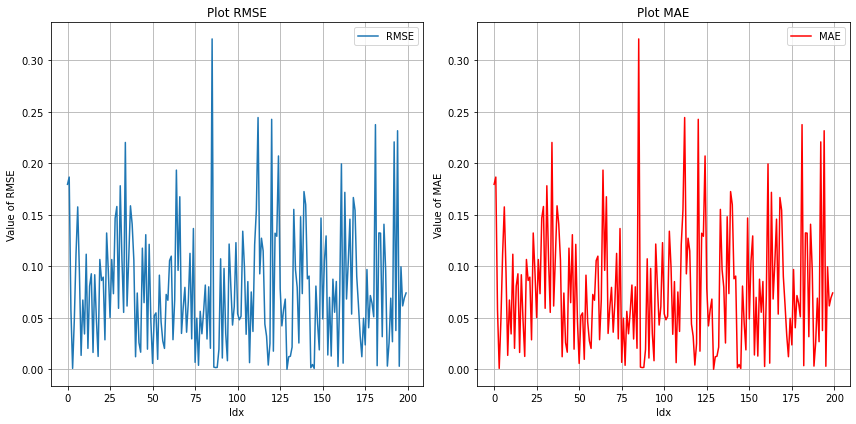

In [51]:
plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.3) 

plt.subplot(1, 2, 1)
plt.plot(loo_rmse, label='RMSE')
plt.xlabel('Idx')
plt.ylabel('Value of RMSE')
plt.title('Grapf RMSE')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(loo_mae, label='MAE', color='red')
plt.xlabel('Idx')
plt.ylabel('Value of MAE')
plt.title('Grapf MAE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## And still there is more! (OPTIONAL)



<img alt="And still there is more!"
     src="no-se-vayan.png">

**Try these methods at home....**

**LeavePOut**: Similar to **KFold**, but inverted. P samples from the test subset are chosen.
It should be noted that this is not equivalent to `KFold(n_splits=n_samples // p)`. **LeavePOut** provides all the possible combinations of P samples to test, leaving the remaining N-P samples for training purposes. This is computationally very expensive if the combinatorial of N samples in groups of P is complex (and usually it is).

`from sklearn.model_selection import LeavePOut`

**SuffleSplit**: Similar to **KFold** but with randomly generated partitions.

`from sklearn.model_selection import ShuffleSplit`
